In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#pd.read_csv('train.csv')

# Any results you write to the current directory are saved as output.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [28]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

test = test.iloc[:,:].values

In [29]:
np.unique(np.isnan(X))

array([False])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

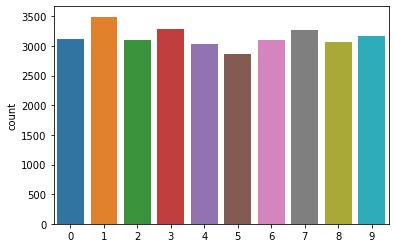

In [31]:
sns.countplot(y_train)

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_test = sc_X.transform(test)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = classifier.predict(x_train)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_acc = accuracy_score(y_train, y_pred)
# conf_mat = confusion_matrix(y_test,y_pred)

In [36]:
# print('\nSVM Trained Classifier Accuracy: ', model_acc)
# print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)
# print('\nConfusion Matrix: \n',conf_mat)


Accuracy of Classifier on Validation Images:  0.9565396825396826


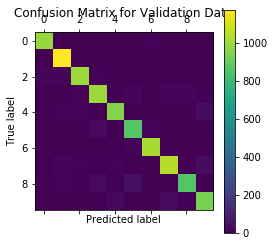

In [23]:
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
result = classifier.predict(sc_test)

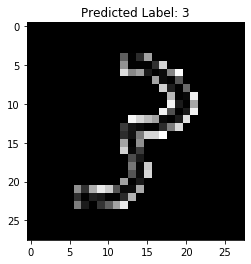

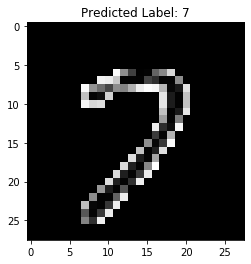

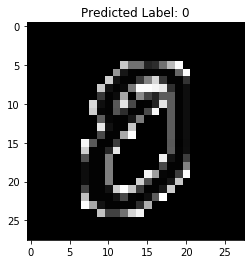

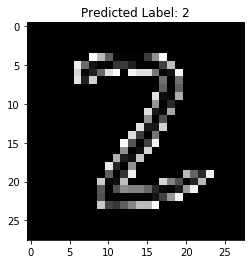

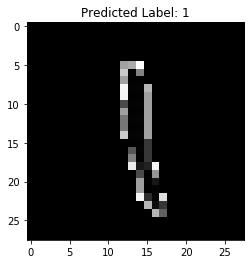

In [25]:
a = np.random.randint(1,400,5)
for i in a:
    two_d = (np.reshape(test[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('Predicted Label: {0}'.format(result[i]))
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()

In [26]:
submission = pd.Series(result,name="Label")

In [27]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [28]:
submission.to_csv("final_submission_v1.csv",index=False)

In [29]:
final_submission = pd.read_csv("final_submission_v1.csv")

In [30]:
final_submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3
